In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./data/blocks.parquet')[['geometry']]
blocks_gdf.head()

,geometry
0,"POLYGON ((354918.622 6625258.829, 354901.464 6..."
1,"POLYGON ((355412.142 6623378.149, 355411.7 662..."
2,"POLYGON ((353934.329 6625429.433, 353923.453 6..."
3,"POLYGON ((355099.099 6623847.765, 355074.808 6..."
4,"POLYGON ((352766.168 6621954.748, 352744.412 6..."


In [2]:
from my_package.methods.zoning_tagger import ZoningTagger

zt = ZoningTagger(blocks_gdf)
zoning_gdf = zt.run()

2024-12-17 15:38:34.990 | INFO     | my_package.methods.zoning_tagger:_fetch_osm:29 - Fetching OSM data
2024-12-17 15:38:47.214 | SUCCESS  | my_package.methods.zoning_tagger:_fetch_osm:35 - OSM data fetched
2024-12-17 15:38:47.256 | INFO     | my_package.methods.zoning_tagger:_process_osm:39 - Processing OSM data
2024-12-17 15:38:47.271 | SUCCESS  | my_package.methods.zoning_tagger:_process_osm:43 - OSM data processed
2024-12-17 15:38:47.289 | INFO     | my_package.methods.zoning_tagger:_get_probabilities:47 - Calculating probabilities
2024-12-17 15:38:56.160 | SUCCESS  | my_package.methods.zoning_tagger:_get_probabilities:68 - Probabilities calculated


In [3]:
zoning_gdf

,geometry,tags_probabilities,tags
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...","{Tag.PUBLIC_BUSINESS: 0.01600582012538488, Tag...",[Tag.PUBLIC_BUSINESS]
1,"POLYGON ((355412.142 6623378.149, 355411.7 662...",{Tag.ENGINEERING_TRANSPORT: 0.2226509848604399},[Tag.ENGINEERING_TRANSPORT]
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",{},[]
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...","{Tag.RESIDENTIAL: 0.25916824038067937, Tag.IND...",[Tag.RESIDENTIAL]
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",{Tag.RESIDENTIAL: 0.014748336981305357},[Tag.RESIDENTIAL]
...,...,...,...
16315,"POLYGON ((335210.252 6655823.328, 335105.217 6...",{},[]
16316,"POLYGON ((315582.435 6679561.357, 315523.467 6...",{},[]
16317,"POLYGON ((316419.909 6679189.653, 316319.749 6...",{Tag.ENGINEERING_TRANSPORT: 0.8146643489074638},[Tag.ENGINEERING_TRANSPORT]
16318,"POLYGON ((315709.232 6679519.841, 315748.877 6...",{Tag.ENGINEERING_TRANSPORT: 0.06845936097255141},[Tag.ENGINEERING_TRANSPORT]


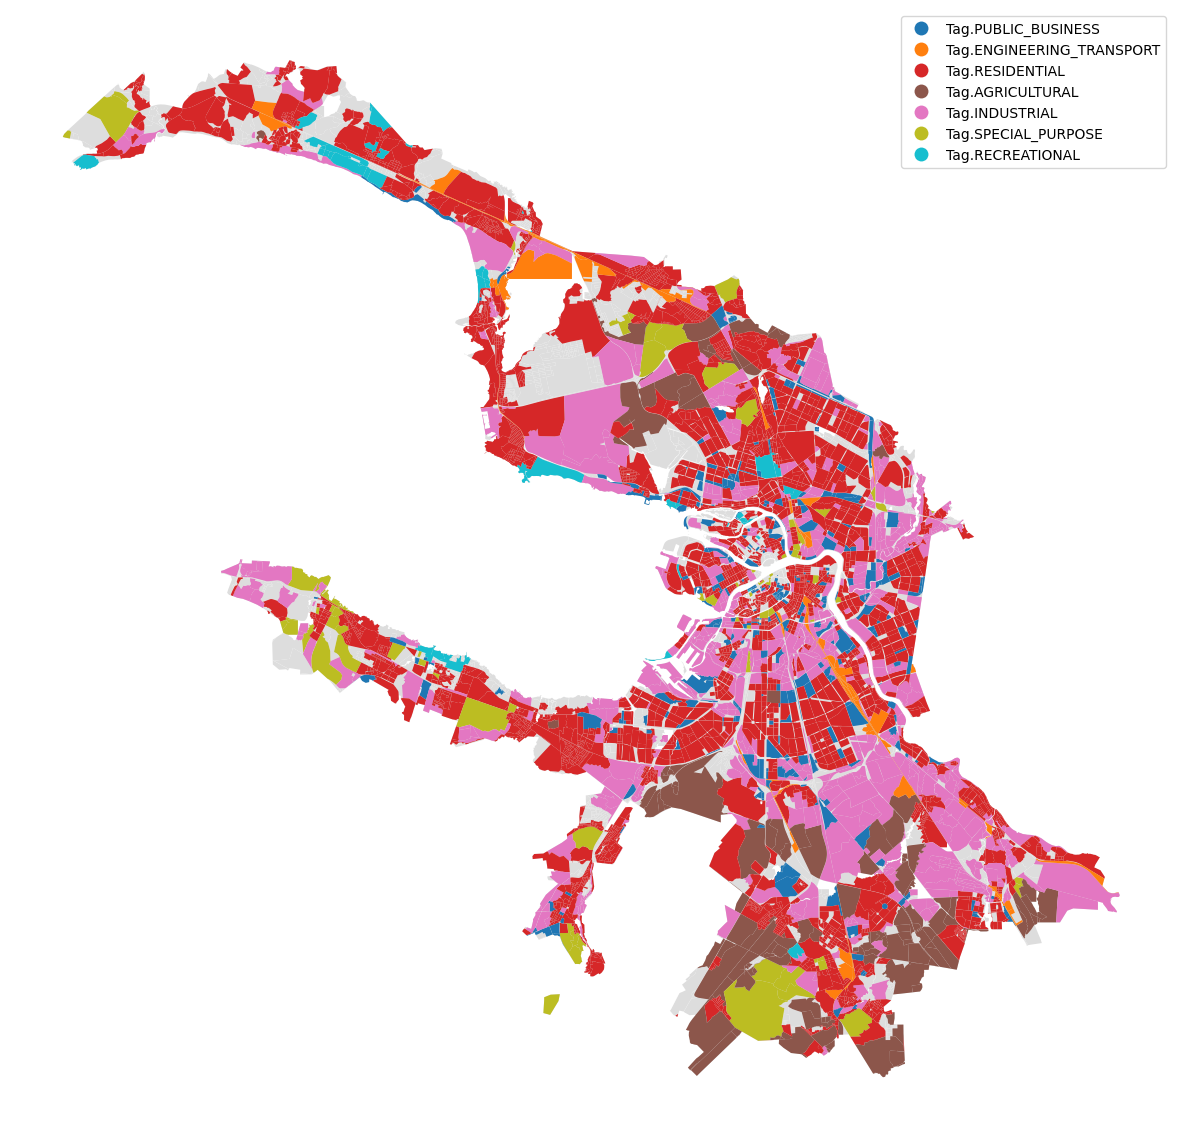

In [4]:
zoning_gdf['tag'] = zoning_gdf['tags'].apply(lambda tags : tags[0] if len(tags)>0 else None)
ax = zoning_gdf.plot(color='#ddd', figsize=(15,15))
zoning_gdf.plot(column='tag', legend=True, ax=ax).set_axis_off()